In [1]:
import pandas as pd
import numpy as np

In [2]:
# Sample student data
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank'],
    'Age': [24, 27, 22, 32, 29, 24],
    'City': ['New York', 'London', 'Paris', 'Tokyo', 'London', 'New York'],
    'Score_Math': [85, 78, 92, 88, 76, 95],
    'Score_English': [78, 88, 85, np.nan, 89, 90],
    'Passed': [True, True, True, False, True, True]
}

df = pd.DataFrame(data)

## Basic Pandas

1. Creating a dataframe: **pd.DataFrame()**
2. Create a series object: **pd.Series()**
3. View beginning or end of the the dataframe: **df.head(), df.tail()**
4. Data types, null values counts overviews of the dataframe: **df.info()**
5. Summary statistics for numerical columns: **df.describe()**
6. Inspect columns and rows: df.columns, **df.index**
7. Dimensions of the dataframe: **df.shape**
8. Datatype of the columns: **df.dtypes**
9. Select columns: **df['col'] / df[['col1','col2']]**
10. Row selection by labels or Positions: **df.loc[] , df.iloc[]**
11. Sort DataFrame by values in columns: **df.sort_values()**
12. Count unique values in series/column: **df.count_values()**


In [5]:
df.head()

,Name,Age,City,Score_Math,Score_English,Passed
0,Alice,24,New York,85,78.0,True
1,Bob,27,London,78,88.0,True
2,Charlie,22,Paris,92,85.0,True
3,David,32,Tokyo,88,NaN,False
4,Eva,29,London,76,89.0,True


In [6]:
df.tail()

,Name,Age,City,Score_Math,Score_English,Passed
1,Bob,27,London,78,88.0,True
2,Charlie,22,Paris,92,85.0,True
3,David,32,Tokyo,88,NaN,False
4,Eva,29,London,76,89.0,True
5,Frank,24,New York,95,90.0,True


In [8]:
df.dtypes

Name              object
Age                int64
City              object
Score_Math         int64
Score_English    float64
Passed              bool
dtype: object

In [9]:
df.columns

Index(['Name', 'Age', 'City', 'Score_Math', 'Score_English', 'Passed'], dtype='object')

In [18]:
#Filtering
df[(df['Age'] >= 20) & (df['Passed'] == True)] 

,Name,Age,City,Score_Math,Score_English,Passed
0,Alice,24,New York,85,78.0,True
1,Bob,27,London,78,88.0,True
2,Charlie,22,Paris,92,85.0,True
4,Eva,29,London,76,89.0,True
5,Frank,24,New York,95,90.0,True


In [20]:
#Filtering using Query Method

df.query('Age > 21 and Passed == True')

,Name,Age,City,Score_Math,Score_English,Passed
0,Alice,24,New York,85,78.0,True
1,Bob,27,London,78,88.0,True
2,Charlie,22,Paris,92,85.0,True
4,Eva,29,London,76,89.0,True
5,Frank,24,New York,95,90.0,True


In [26]:
#Descriptive stats, rounding off to 2 decimal points

df.describe().round(2)

,Age,Score_Math,Score_English
count,6.00,6.00,5.00
mean,26.33,85.67,86.00
std,3.72,7.55,4.85
min,22.00,76.00,78.00
25%,24.00,79.75,85.00
50%,25.50,86.50,88.00
75%,28.50,91.00,89.00
max,32.00,95.00,90.00


In [29]:
#finding null 

df.isnull().sum()

Name             0
Age              0
City             0
Score_Math       0
Score_English    1
Passed           0
dtype: int64

In [ ]:
#missing value imputation using Mean().

df.fillna(df['Score_English'].mean())

,Name,Age,City,Score_Math,Score_English,Passed
0,Alice,24,New York,85,78.0,True
1,Bob,27,London,78,88.0,True
2,Charlie,22,Paris,92,85.0,True
3,David,32,Tokyo,88,86.0,False
4,Eva,29,London,76,89.0,True
5,Frank,24,New York,95,90.0,True


In [31]:
df.isnull().sum()

Name             0
Age              0
City             0
Score_Math       0
Score_English    1
Passed           0
dtype: int64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Score_Math'}>],
       [<Axes: title={'center': 'Score_English'}>, <Axes: >]],
      dtype=object)

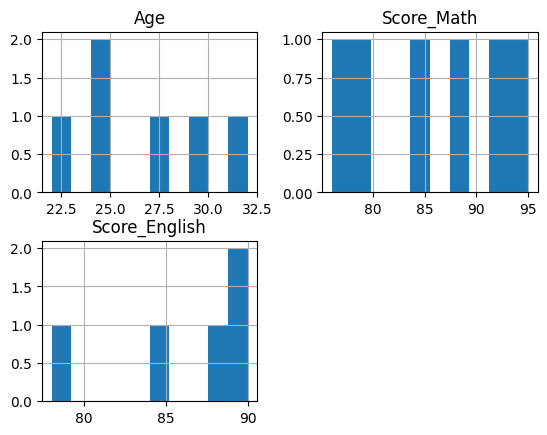

In [32]:
df.hist()

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

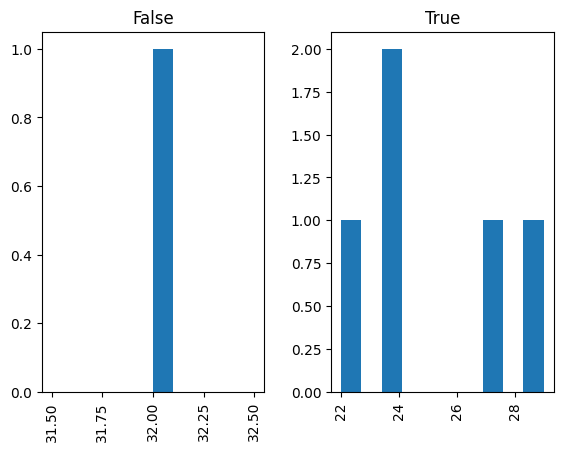

In [33]:
df.hist(column='Age', by='Passed')

## Intermediate Pandas

1. Remove rows or columns: **df.drop()**
2. Rename columns or indices: **df.rename()**
3. Handle missing values: **df.fillna(), df.dropna()**
4. Detect/Remove duplicate rows: **df.duplicate(), df.drop_duplicates()**
5. Replace values with new ones: **df.replace()**
6. Apply functions to Rows/Columns: **df.apply()**
7. Aggregate by groups: **df.groupby()**
8. Apply multiple aggregation at once: **df.agg()**
9. Summaries data into multi-dimensional tables(Pivot Table): **df.pivot_table()**
10. Detect missing values: **df.isnull()**
11. Query dataframe with expression: **df.query()**
12. Random row sampling: **df.sample()**
 

## 

In [34]:
#Adding new column df['Total_marks']

df['total_marks'] = df['Score_Math'] + df['Score_English']

In [35]:
df.head()

,Name,Age,City,Score_Math,Score_English,Passed,total_marks
0,Alice,24,New York,85,78.0,True,163.0
1,Bob,27,London,78,88.0,True,166.0
2,Charlie,22,Paris,92,85.0,True,177.0
3,David,32,Tokyo,88,NaN,False,NaN
4,Eva,29,London,76,89.0,True,165.0


In [36]:
#groupby and aggregate


df.groupby('City')['Score_Math'].mean()

City
London      77.0
New York    90.0
Paris       92.0
Tokyo       88.0
Name: Score_Math, dtype: float64

In [38]:
#Lambda function

df['Age'] = df['Age'].apply(lambda x: x+1)

In [39]:
df.head()

,Name,Age,City,Score_Math,Score_English,Passed,total_marks
0,Alice,25,New York,85,78.0,True,163.0
1,Bob,28,London,78,88.0,True,166.0
2,Charlie,23,Paris,92,85.0,True,177.0
3,David,33,Tokyo,88,NaN,False,NaN
4,Eva,30,London,76,89.0,True,165.0


## Advanced Pandas


1. Pivot: **df.pivot_table()**
2. Merge/Join: **pd.merge() , pd.concat(), pd.join()**
3. Window function -- rolling function: **df.rolling()**
4. Reshaping dataframe: **df.melt(), df.stack(), df.unstack()**
5. Correlation between columns: **df.corr()**
6. Convert to datetime object for time series: **df.to_datetime()**
7. One-hot encoding: **pd.get_dummies()**
8. Bin continouse numeric data: **pd.cut(), pd.qcut()**
9. Cross-tabulation of frequency between two features: **pd.crosstab()**
10. Count distinct values across dataframe: **df.nunique()**
11. Perform transformation within groupby: **df.transform()**

In [44]:
df.pivot_table(index='City', values='total_marks', aggfunc='mean')

,total_marks
City,
London,165.5
New York,174.0
Paris,177.0


In [47]:
#window function -- rolling window

df['Score_Math'].rolling(window=2).mean()

0     NaN
1    81.5
2    85.0
3    90.0
4    82.0
5    85.5
Name: Score_Math, dtype: float64